In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import datetime
import glob
import os

headers = ["Date", "Price", "Postcode"]
files = ["RG30","RG315","RG316"]
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2023, 12, 31)
df = pd.concat(
    (pd.read_csv(f"./{file}.csv", usecols=headers).assign(Source=file) for file in files), 
    ignore_index=True
)
# df = df[(df.Postcode.str.startswith("RG31"))]
df = df[(df.Price < 3000000)]
df.Date = pd.to_datetime(df.Date, errors='coerce')
df = df[(df.Date > start) & (df.Date < end)]
df.Price = pd.to_numeric(df.Price).div(1000)
df = df.sort_values(by=['Date'])
df.set_index('Date', inplace=True)

df30 = df[(df.Source == "RG30")]
df315 = df[(df.Source == "RG315")]
df316 = df[(df.Source == "RG316")]

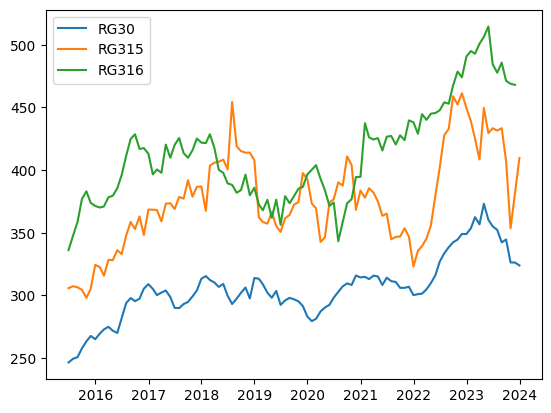

In [138]:
#plt.plot(df.Price.resample("ME").mean().rolling(window=6).mean(), label="All")
plt.plot(df30.Price.resample("ME").mean().rolling(window=6).mean(), label="RG30")
plt.plot(df315.Price.resample("ME").mean().rolling(window=6).mean(), label="RG315")
plt.plot(df316.Price.resample("ME").mean().rolling(window=6).mean(), label="RG316")
plt.gca().xaxis.set_major_locator(YearLocator())
plt.legend()
plt.show()

In [153]:
floor = 1

monthly_counts = df[(df.Price > floor)].resample('ME').size()
monthly_counts_30 = df30[(df30.Price > floor)].resample('ME').size()
monthly_counts_315 = df315[(df315.Price > floor)].resample('ME').size()
monthly_counts_316 = df316[(df316.Price > floor)].resample('ME').size()
print(monthly_counts.tail(36))

Date
2021-01-31     96
2021-02-28     92
2021-03-31    161
2021-04-30     84
2021-05-31    100
2021-06-30    220
2021-07-31     59
2021-08-31     76
2021-09-30    170
2021-10-31     70
2021-11-30     88
2021-12-31     71
2022-01-31     75
2022-02-28     83
2022-03-31     69
2022-04-30     71
2022-05-31     88
2022-06-30     71
2022-07-31     78
2022-08-31    101
2022-09-30     78
2022-10-31     95
2022-11-30     90
2022-12-31     74
2023-01-31     77
2023-02-28     68
2023-03-31     63
2023-04-30     48
2023-05-31     59
2023-06-30     50
2023-07-31     58
2023-08-31     62
2023-09-30     68
2023-10-31     34
2023-11-30     11
2023-12-31      6
Freq: ME, dtype: int64


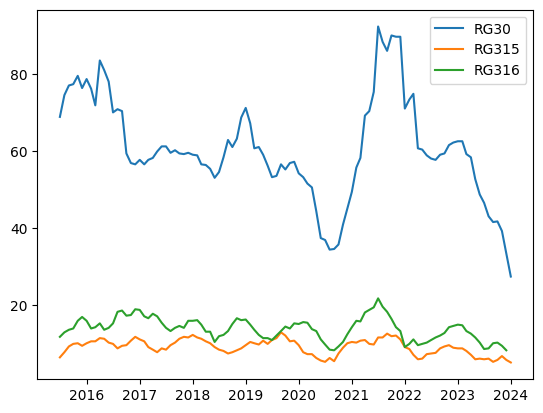

In [144]:
plt.plot(monthly_counts_30.rolling(window=6).mean(), label="RG30")
plt.plot(monthly_counts_315.rolling(window=6).mean(), label="RG315")
plt.plot(monthly_counts_316.rolling(window=6).mean(), label="RG316")
plt.gca().xaxis.set_major_locator(YearLocator())
plt.legend()
plt.show()